# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 15 баллов
* Задача 3 &mdash; 15 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 20 баллов
* Задача 5 &mdash; 30 баллов





-----

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

%matplotlib inline

### <b><font color="blue">Легкая часть</font></b> 


## Задача 1 на гистограммы и  выборочные статистики.

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [3]:
airData =  pd.read_csv("airquality.csv")
airData.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [4]:
airData.describe().apply(lambda x: round(x, 2))

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.00,146.00,153.00,153.00,153.00,153.00
mean,42.13,185.93,9.96,77.88,6.99,15.80
std,32.99,90.06,3.52,9.47,1.42,8.86
min,1.00,7.00,1.70,56.00,5.00,1.00
25%,18.00,115.75,7.40,72.00,6.00,8.00
50%,31.50,205.00,9.70,79.00,7.00,16.00
75%,63.25,258.75,11.50,85.00,8.00,23.00
max,168.00,334.00,20.70,97.00,9.00,31.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** 

Для предположения о наличии выбросов сравним медиану и среднее значение(см ячейку ниже).

Согласно этим данным предположу, что выбросы присутствуют в колонках $Solar.R$ и $Ozone$

In [5]:
targetColumns = ["Ozone", "Solar.R", "Wind", "Temp"]

for name, column in airData[targetColumns].iteritems():
    print(f"{name} mean is: {column.mean():.2f} \t and median is: {column.median():.2f}")
    print("Процентная разница = {:.0f}%".format(200 * np.abs(column.mean() - column.median()) / \
                                                         (column.mean() + column.median())))

Ozone mean is: 42.13 	 and median is: 31.50
Процентная разница = 29%
Solar.R mean is: 185.93 	 and median is: 205.00
Процентная разница = 10%
Wind mean is: 9.96 	 and median is: 9.70
Процентная разница = 3%
Temp mean is: 77.88 	 and median is: 79.00
Процентная разница = 1%


/tmp/ipykernel_114379/266508719.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in airData[targetColumns].iteritems():


**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

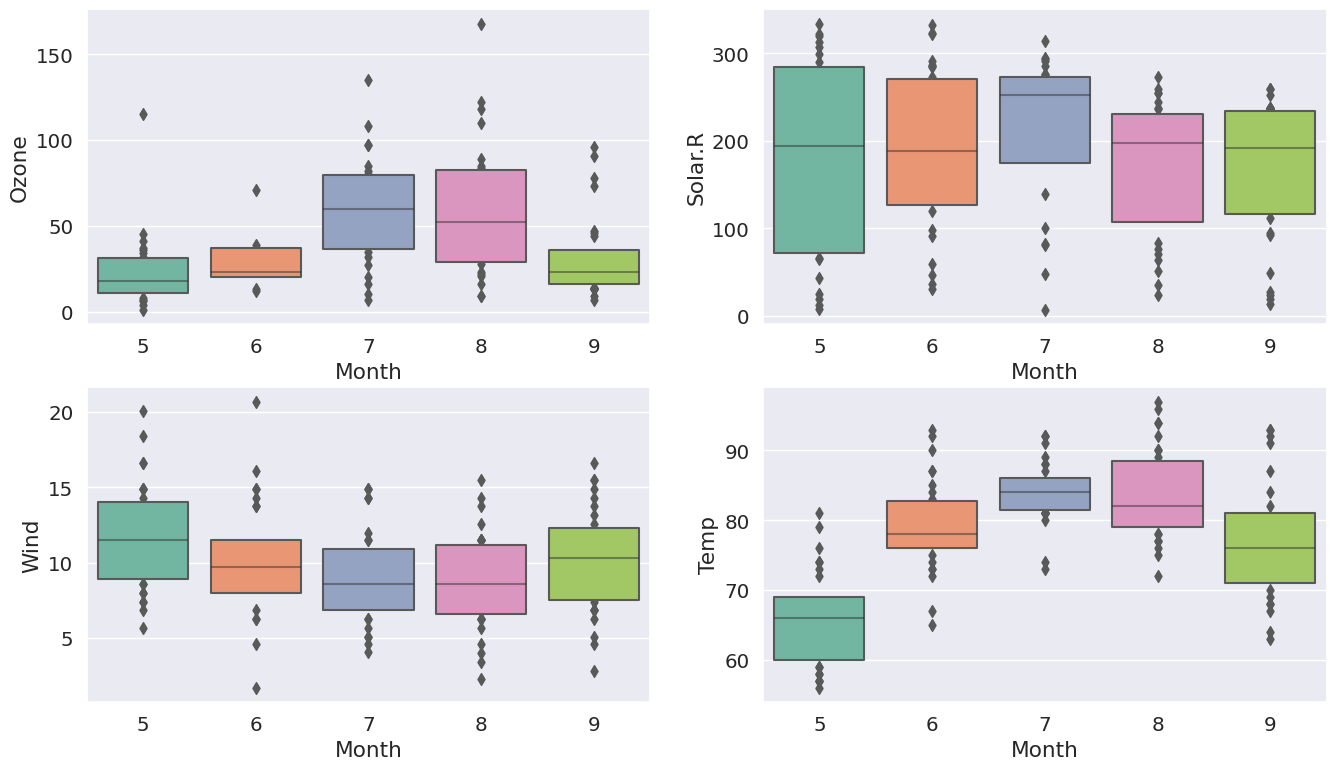

In [6]:

fig, ax = plt.subplots(2, 2, figsize = (16,9), dpi = 100)

for ind, column in enumerate(targetColumns):
    indX, indY = ind // 2, ind % 2
    sns.boxenplot(data = airData,
                  x = "Month", 
                  y = column,
                  ax = ax[indX, indY])
    # ax[indX, indY].axhline(np.mean(airData[column]),
    #                        alpha = 0.7,
    #                        color = 'pink',
    #                        label = 'Среднее')
    # ax[indX, indY].legend()

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:** Ящик с усами позволяет сделать вывод о выбросах присутствующих в рассматриваемой выборке(выбросами считаем значения, выходящие далеко за $2 \sigma$).

Вышепостроенные графики могут хорошо изображать зависимость определенного параметра от номера месяца(в качестве значения выступает медиана).

Так же графики помогают оценить зависимости максимального и минимлаьного значения параметра от номера месяца.



**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;

In [7]:
print("Колонка Ozone - медиана = {:.2f}, среднее = {:.2f}".format(np.nanmedian(airData.Ozone),
                                                                  np.nanmean(airData.Ozone)))

Колонка Ozone - медиана = 31.50, среднее = 42.13


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:**

Думаю, что различия вызваны разностью оцениваемых параметров. В общем случае математическое ожидание и медиана случаной величины не должны совпадать. 

Выборочная медиана является состоятельной оценкой медианы случайной величины, а выборочное среденее - математического ожидания. Таким образом, при рассмотрении большой выборки выборочная медиана и выборочное среднее могут сойтись к разным значениям.

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:**

Не понял как конкретно интерпретировать вопрос, поэтому попробую ответить сразу на две возможные интерпретации.

Если рассматривать конкретный столбец, например:
$$
Ozone = [\eta_{1}, \ \eta_{2}, \ \dots \eta_{n}]
$$

то величины $\eta_{i}$ принято считать независимыми в совокупности. Доказать это утверждение строго не могу.

Если рассматривать возможность зависимости случайных величин в строках, то они естественно ялвяются зависимыми. Ведь суть эксперимента заключается в том, чтобы найти зависимость между различными рассматриваемыми параметрами ситемы.

Проверить последнее утверждение помогает матрица корреляции(см ячейку ниже).

Как видим рассматриваемые величины зависят друг от друга, так как коэффициент корреляции сильно превышает 0.

Например, концентрация озона возрастает с ростом температуры(звучит логично по крайней мере) - $\rho_{Ozone \ v \ Temp} = 0.7$. 

Еще более логичный пример - падение температуры в более ветренную погоду $\rho_{Wind \ v \ Temp} = 0.5$

In [16]:
airData[targetColumns].corr().round(1)

,Ozone,Solar.R,Wind,Temp
Ozone,1.0,0.3,-0.6,0.7
Solar.R,0.3,1.0,-0.1,0.3
Wind,-0.6,-0.1,1.0,-0.5
Temp,0.7,0.3,-0.5,1.0


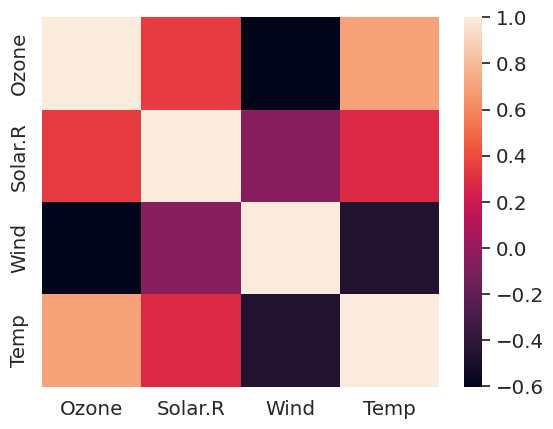

In [19]:
sns.heatmap(airData[targetColumns].corr());

А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие вы есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете далее, но задуматься и порассуждать полезно уже сейчас.

**Ответ:** 

Количественными мерами зависимости между признаками является коэффициент корреляции. Это как-бы косинус угла между рассматриваемыми величинами. Например если $\rho = 0$, то величины перпендикулярны и одна величина не может быть выражена через дугую.

Если же $\rho = 1$, то случайные величины параллельны и, соответственно, линейно зависят друг от друга.

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.



**Вывод:**

Мне показалось, что наилучшим способом отсечения выбросов в рассматриваемой выборке является гистограмма. Там всё визуально просто, а к **boxplot** пока привыкаю. Поэтому конкретного сравнения между этими инструментами сделать не могу.

Независимые, одинаково распределённые случайные величины действительно приствуют в реальном мире. И на этом построено множество физических теорий(например термодинамические распределения), которые действительно работают =)

## Задача 2
Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце. Для работы с табличными данными используйте библиотеку `pandas`.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение.
Требуется построить: 
 * асимтотические доверительные интервалы при помощи центральной предельной теоремы;
 * точные неасимптотические при помощи распределений хи-квадрат, Стьюдента.

 
 Запишите их в виде таблицы.

Сделайте выводы по полученной таблице.

**Вывод:**

## Задача 3

Постройте плотность стандартного **нормального распределения** и стандартного **распределения Коши**. Видим, что распределение Коши обладает более тяжелыми хвостами, нежели нормальное.

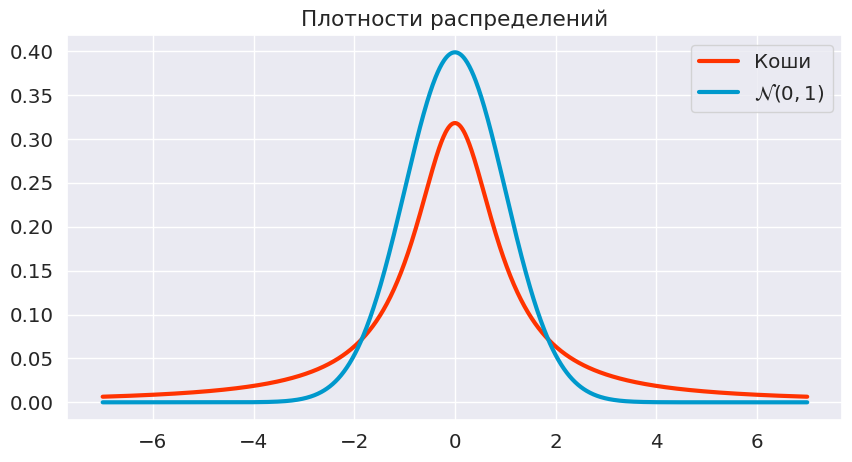

In [8]:
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(10, 5))
plt.plot(grid,
          sps.cauchy.pdf(grid), 
          color=red, 
          label='Коши', 
          lw=3)
plt.plot(grid, sps.norm.pdf(grid), color=blue, 
         label='$\mathcal{N}(0, 1)$', lw=3)
plt.title('Плотности распределений')
plt.legend();

Сгенерируйте $10^5$ выборок размера 30 из стандартного **нормального распределения**.

In [20]:
sample_count, sample_size = int(1e5), 30

sample = sps.norm.rvs(size = (sample_count, sample_size))
sample_means = np.mean(sample, axis = 1)

По каждой выборке из 30 элементов посчитайте выборочные средние. Далее по ним постройте гистограмму и плотность стандартного нормального распределения. Какой вывод вы можете сделать из полученного графика?

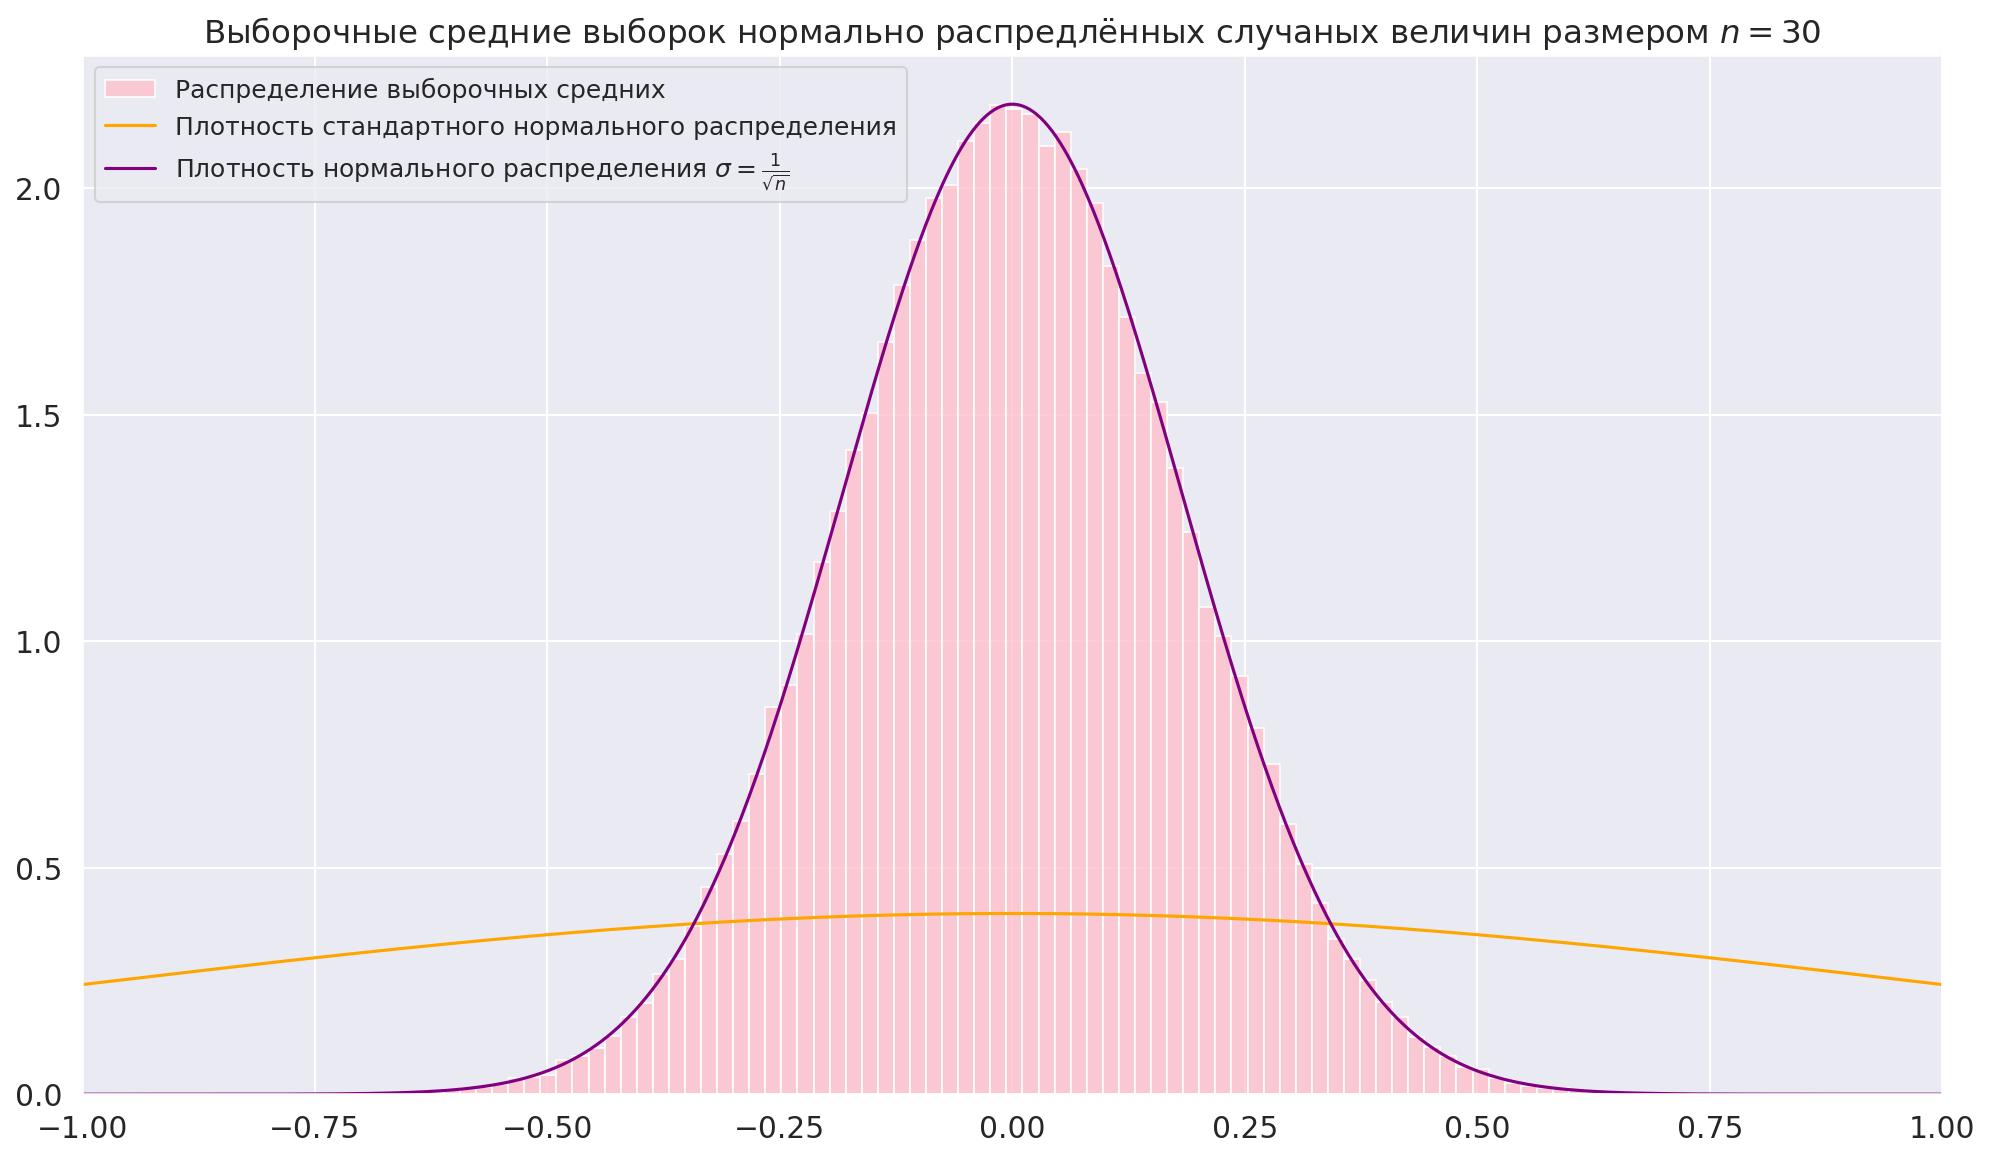

In [23]:
xAx = np.linspace(-1, 1, 1000)
norm_standart = sps.norm.pdf(xAx)
norm = sps.norm(scale = 1 / np.sqrt(sample_size), loc = 0).pdf(xAx)

plt.figure(figsize = (16, 9), dpi = 150)

plt.hist(sample_means, 
         density = True,
         color = 'pink',
         alpha = 0.8,
         label = 'Распределение выборочных средних',
         bins = 100)
plt.plot(xAx, 
         norm_standart, 
         label = "Плотность стандартного нормального распределения",
         color = 'orange')
plt.plot(xAx,
         norm,
         label = r"Плотность нормального распределения $\sigma = \frac{1}{\sqrt{n}}$",
         color = 'purple')

plt.xlim(-1, 1)
plt.legend(loc = 'upper left',
           fontsize = 12);
plt.title(f"Выборочные средние выборок нормально распредлённых случаных величин размером $n = {sample_size}$");

**Вывод:**

Выборочное среднее нормально распределенных случайных величин имеет нормальное распределение - проиллюстрированно на <span style = "color:pink"> розовой </span> гистограмме.

Параметры этого распределения могут быть найдены из **ЦПТ**:
$$
\sqrt{n} \frac{\overline{X_{n}} - \operatorname{E}{X_{1}}}{\sigma} \to N(0,1)
$$

В нашей задаче $\operatorname{E}{X_{1}} = 0, \ \sigma = 1$, а значит $\overline{X_{n}} \to N(0, 1/\sqrt{n})$(проиллюстрированно на <span style = "color:purple"> фиолетовом </span> графике)


Сгенерируем $10^5$ выборок размера 30 из стандартного **распределения Коши**.

In [24]:
sample_count, sample_size = int(1e5), 30

sample = sps.cauchy.rvs(size = (sample_count, sample_size))
sample_means = np.mean(sample, axis = 1)

Построим аналогичный график. 

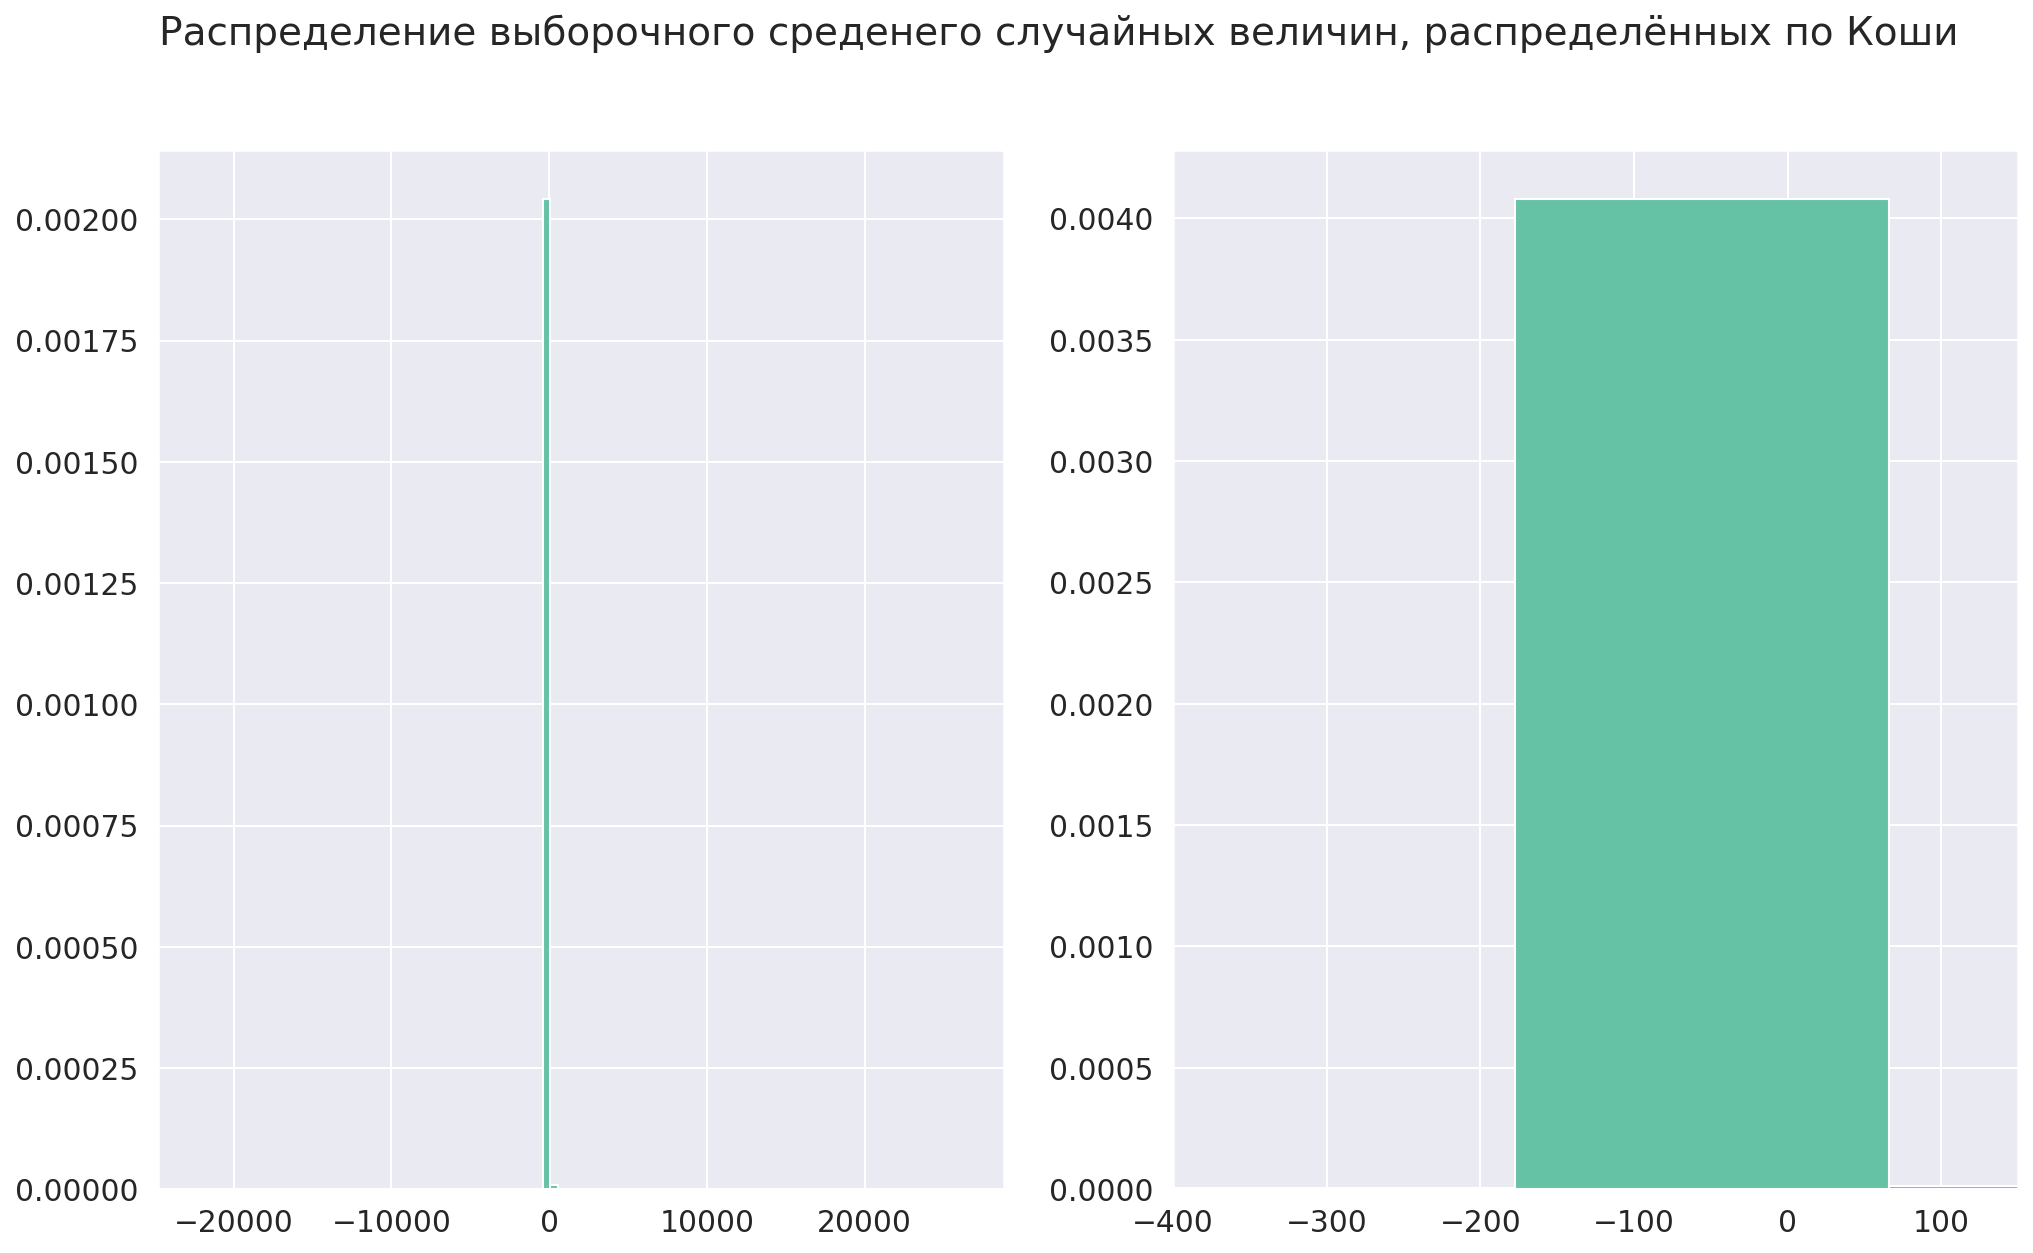

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (16,9), dpi = 150)

ax[0].hist(sample_means,
           density = True,
           bins = 100)

ax[1].hist(sample_means,
           density = True,
           bins = 200)

ax[1].set_xlim(-400, 150)
fig.suptitle("Распределение выборочного среденего случайных величин, распределённых по Коши");

Сравните графики для нормального распределения и для Коши, опишите ваше сравнение в выводе по задаче.

**Вывод:**

Кажется, что распределение выборочных средних случайных величин, распределённых по Коши - равномерное. 

Возможно это связано с тем, что выборочное среднее в случае распределения Коши не приближает никакого реального парметра. Поэтому оно равновероятно принимает любое значение.

ЦПТ для распределения Коши не работает =(


### <b><font color="orange">Сложная часть</font></b>

## Задача 4

В этой задаче нужно визуализировать доверительные интервалы для выборки из равномерного распределения $U[0, \theta]$.


1. Постройте асимптотический доверительный интервал для $\theta$, используя асимптотически нормальную оценку $\theta$.




2. Постройте точный доверительный интервал для $\theta$, используя статистику $X_{(n)}$.

    - Найдите функцию распредления $X_{(n)}$ по определению. 
    - Точный доверительный интервал для $\theta$ имеет смысл строить в виде $(X_{(n)}, X_{(n)} + c_{\alpha})$ (поясните почему). 
    - Нужно найти такое $c_{\alpha}$, что $\mathsf{P_{\theta}}(\theta \in (X_{(n)}, X_{(n)} + c_{\alpha})) = \alpha$ 

**Ответ:**

##### Задание 1

**Шаг 1 - найдём ассимтотически нормальную оценку для параметра $\theta$**

Согласно какой-то теореме(не смог найти/вспомнить название) оценки полученные методом максимального правдоподобия являются состоятельными и ассимтотически нормальными. 

Найдём оценку:

$$
\eta_{1} \in U_{0, \theta} \
\operatorname{E} \eta_{i} = \frac{\theta}{2} = \overline{X} \to \theta = 2 \overline{X}
$$

**Шаг 2 - ассимтотически доверительный интервал**

Ассимтотическая дисперсия выборочного среднего есть дисперсия самих случайных величин - в нашем случае $\theta^{2} / 12$. А значит ассимтотическая дисперсия рассматриваемой оценки есть $\theta^{2} / 3$(возможно я привёл некорректное доказательство, ниже есть более убедительное). Таким образом:
$$
\sqrt{n} (2 \overline{X} - \theta) \to N(0, \frac{\theta^{2}}{3}) \to 2 \overline{X} - \theta \to N(0, \frac{\theta^{2}}{3 n})
$$

А значит 

$$
\operatorname{P}(\theta + x_{\alpha/2} < 2 \overline{X} < \theta + x_{1 - \alpha/2}) = 1 - \alpha
$$

Где $x_{i}$ - квантили для расписанного выше нормального распределения
(Что то вообще не то по смыслу получилось, нужно доразобраться)

Визуализируйте интервалы. Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя написанную ниже функцию. Нужно нанести на график точки выборки.

Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.

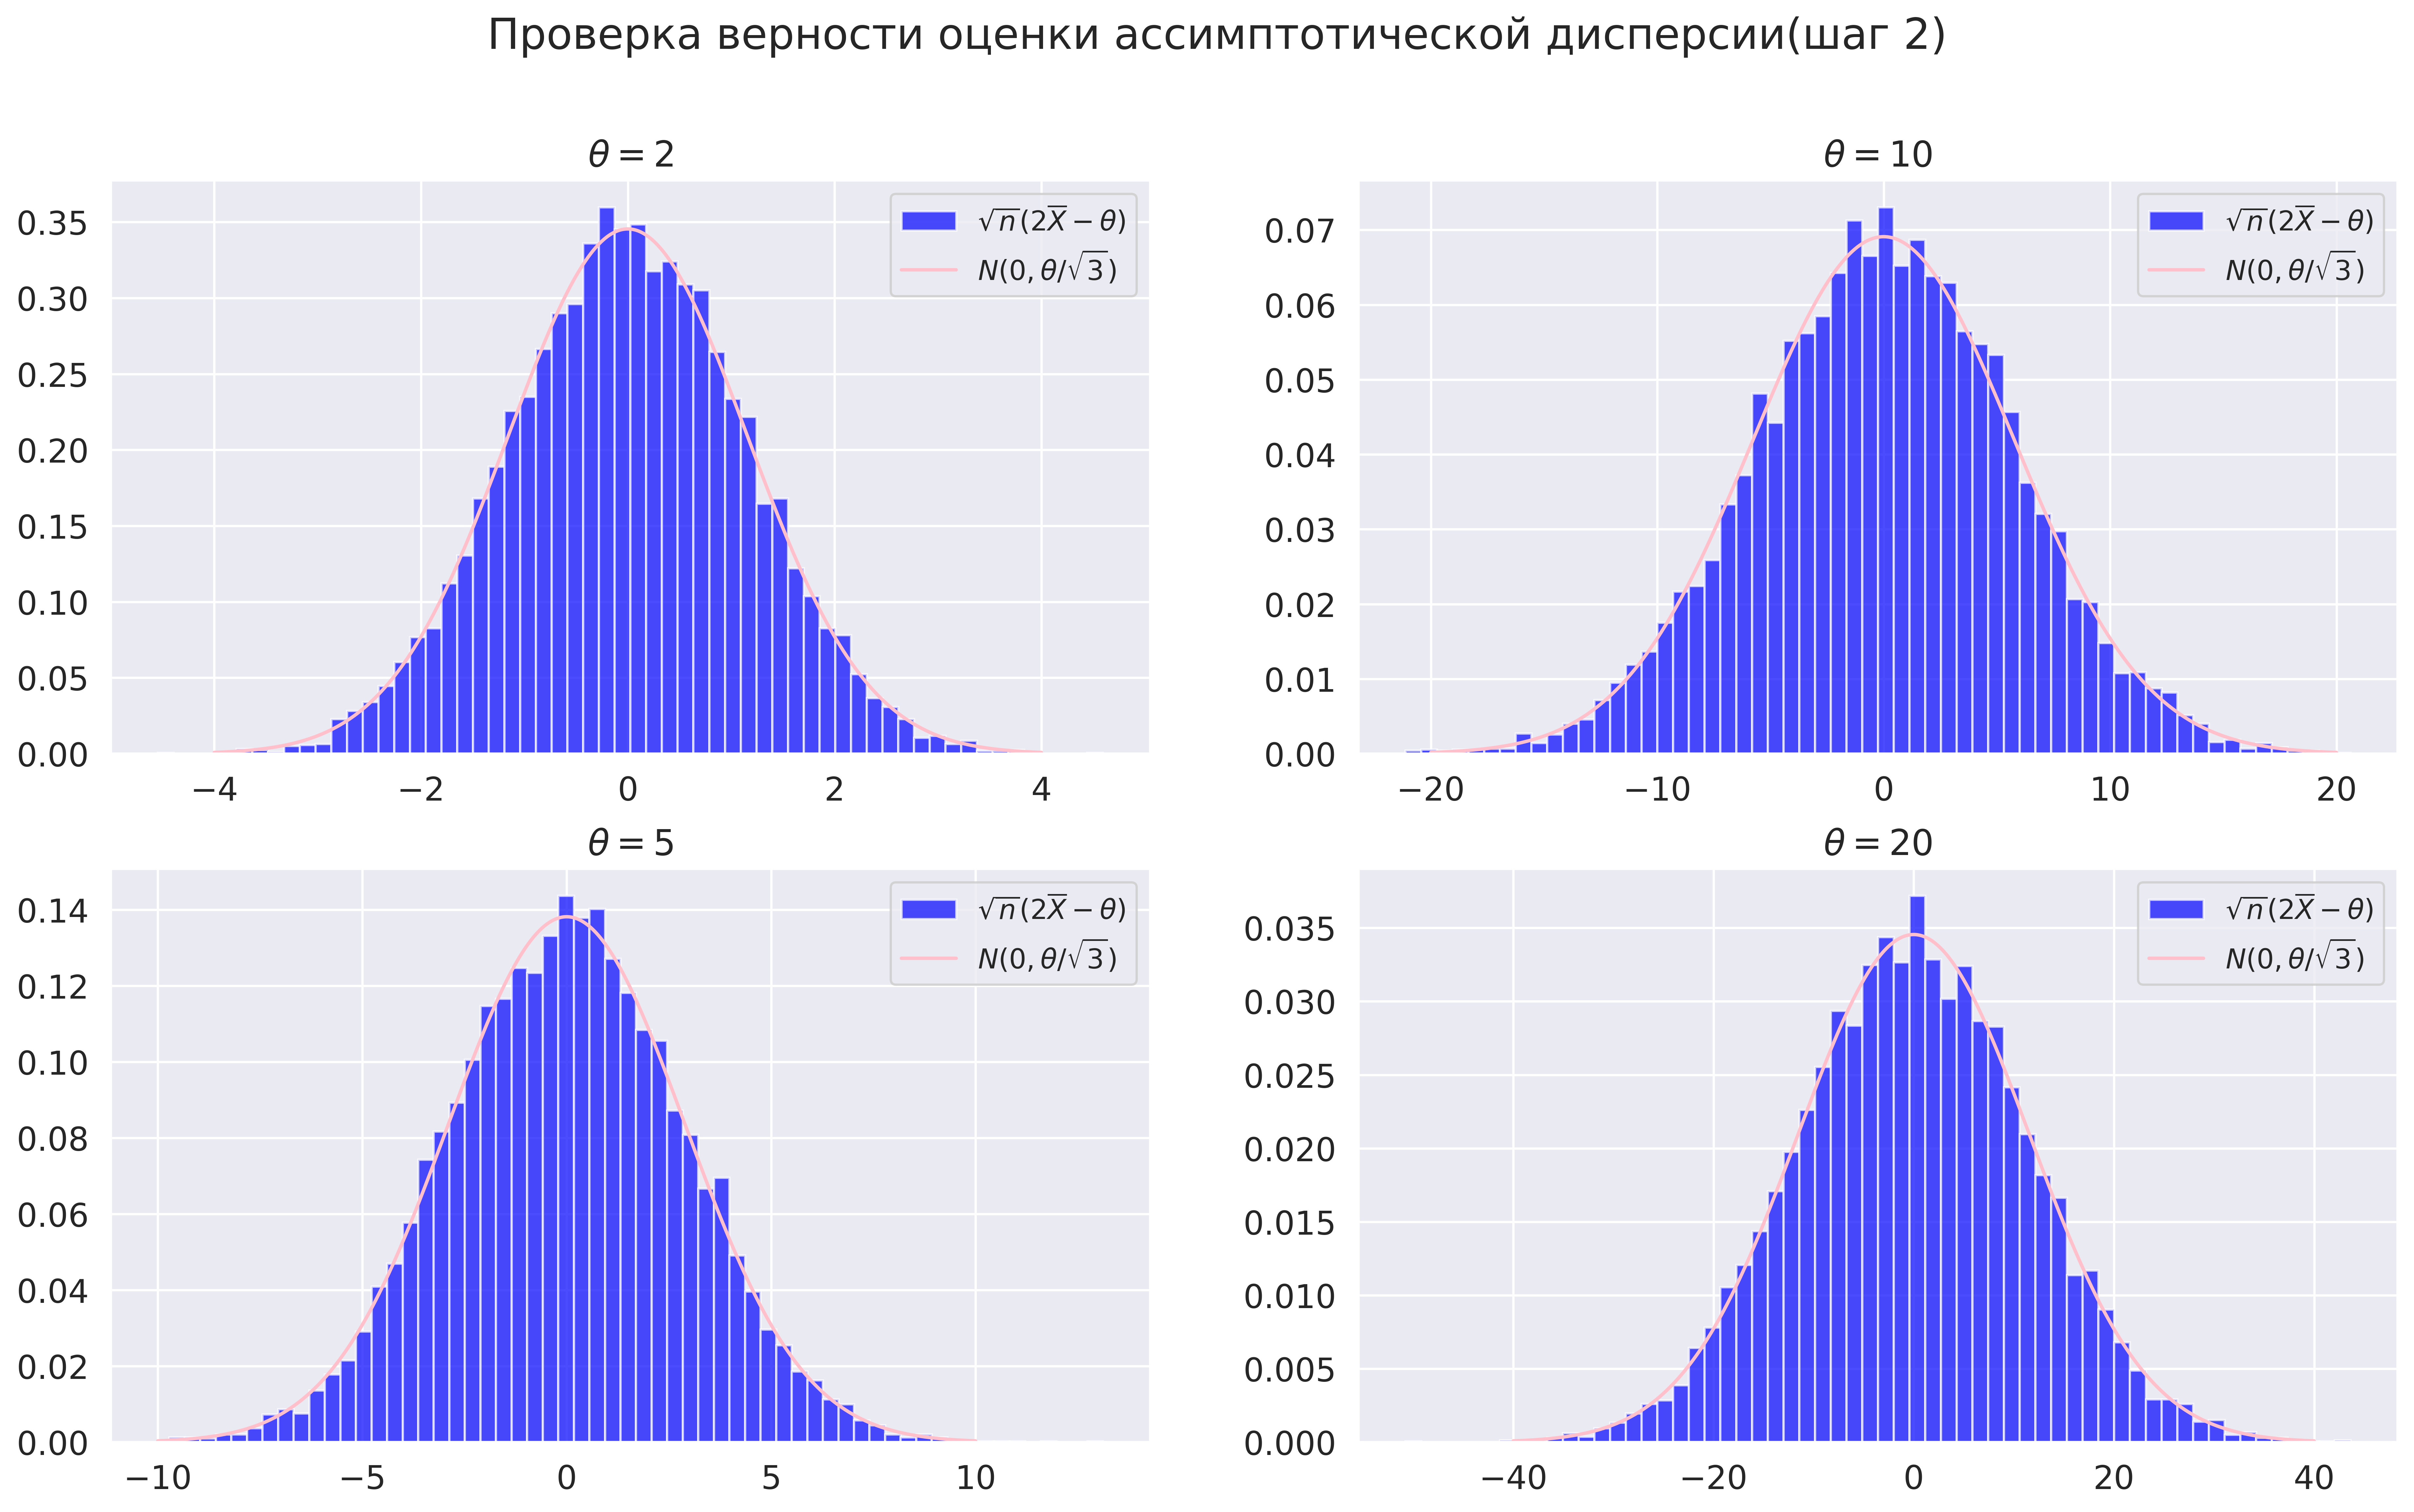

In [3]:
fig, ax = plt.subplots(2, 2, figsize = (18,10), dpi = 500)

for ind, theta_real in enumerate([2, 5, 10, 20]):
    indX, indY = ind % 2, ind // 2
    sample_count, sample_size = int(1e4), 100

    sample = sps.uniform(loc = 0, scale = theta_real).rvs(size = (sample_count, sample_size))

    normalno = np.sqrt(sample_size) * (2 * sample.mean(axis = 1) - theta_real)

    xAx = np.linspace(- 2 * theta_real, 2 * theta_real, 1000)
    yAx = sps.norm(loc = 0, scale = theta_real/np.sqrt(3)).pdf(xAx)

    
    ax[indX, indY].hist(normalno, 
                        bins = 60,
                        alpha = 0.7,
                        density = True,
                        color = 'blue',
                        label = r'$\sqrt{n} (2 \overline{X} - \theta)$')
    
    ax[indX, indY].plot(xAx,
                        yAx,
                        color = 'pink',
                        label = r"$N(0, \theta / \sqrt{3})$")
    ax[indX, indY].legend(fontsize = 12)

    ax[indX, indY].set_title(r"$\theta = {}$".format(theta_real))

fig.suptitle('Проверка верности оценки ассимптотической дисперсии(шаг 2)');

In [10]:
import typing as tp
def draw_confidence_interval(
    left: np.ndarray,
    right: np.ndarray,
    estim_label: tp.Iterable[str],
    estimation: tp.Iterable[tp.Callable[[np.ndarray], np.ndarray]],
    sample: np.ndarray, 
    ylim=(None, None), 
    sample_label='',
    color: str = 'pink',
    interval_label=None
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param estim_label: подпись к оценке
    :param sample_label: подпись к выборке
    :param color: цвет, которым будет отображен доверительный интервал
    '''
    
    sampleSizes = np.arange(len(sample)) + 1

    plt.fill_between(sampleSizes, left, right, color)
    
    for estimText, estim in zip(estim_label, estimation):
        plt.plot(sampleSizes, 
                 estim(sample), 
                 label = estimText)
    
    plt.show()
    

**Решение:**

ValueError: where size (1) does not match x size (100)

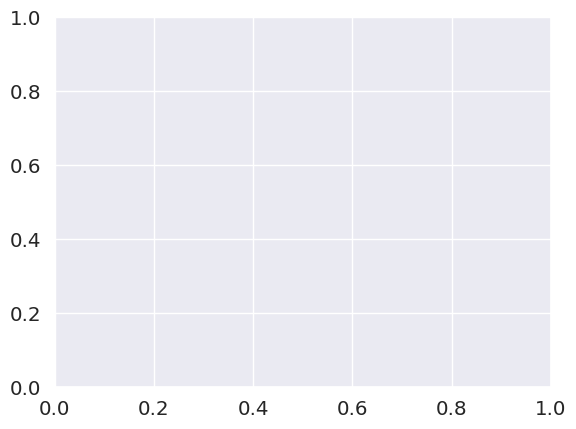

In [12]:
sample_size, theta_real, alpha = 100, 5, 0.05
sample = sps.uniform.rvs(size = sample_size)

estimation = (lambda X: 2*np.cumsum(X) / (np.arange(len(X)) + 1))
estimation_label = (r"$\overline{X}$")

left = [theta_real + sps.norm(loc = 0, scale = theta_real / np.sqrt(3 * n)).ppf(alpha / 2) for n in np.arange(sample_size) + 1]

right = [theta_real + sps.norm(loc = 0, scale = theta_real / np.sqrt(3 * n)).ppf((1 - alpha) / 2) for n in np.arange(sample_size) + 1]

draw_confidence_interval(left, right, estimation_label, estimation, sample)

**Вывод:**


## Задача 5


Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

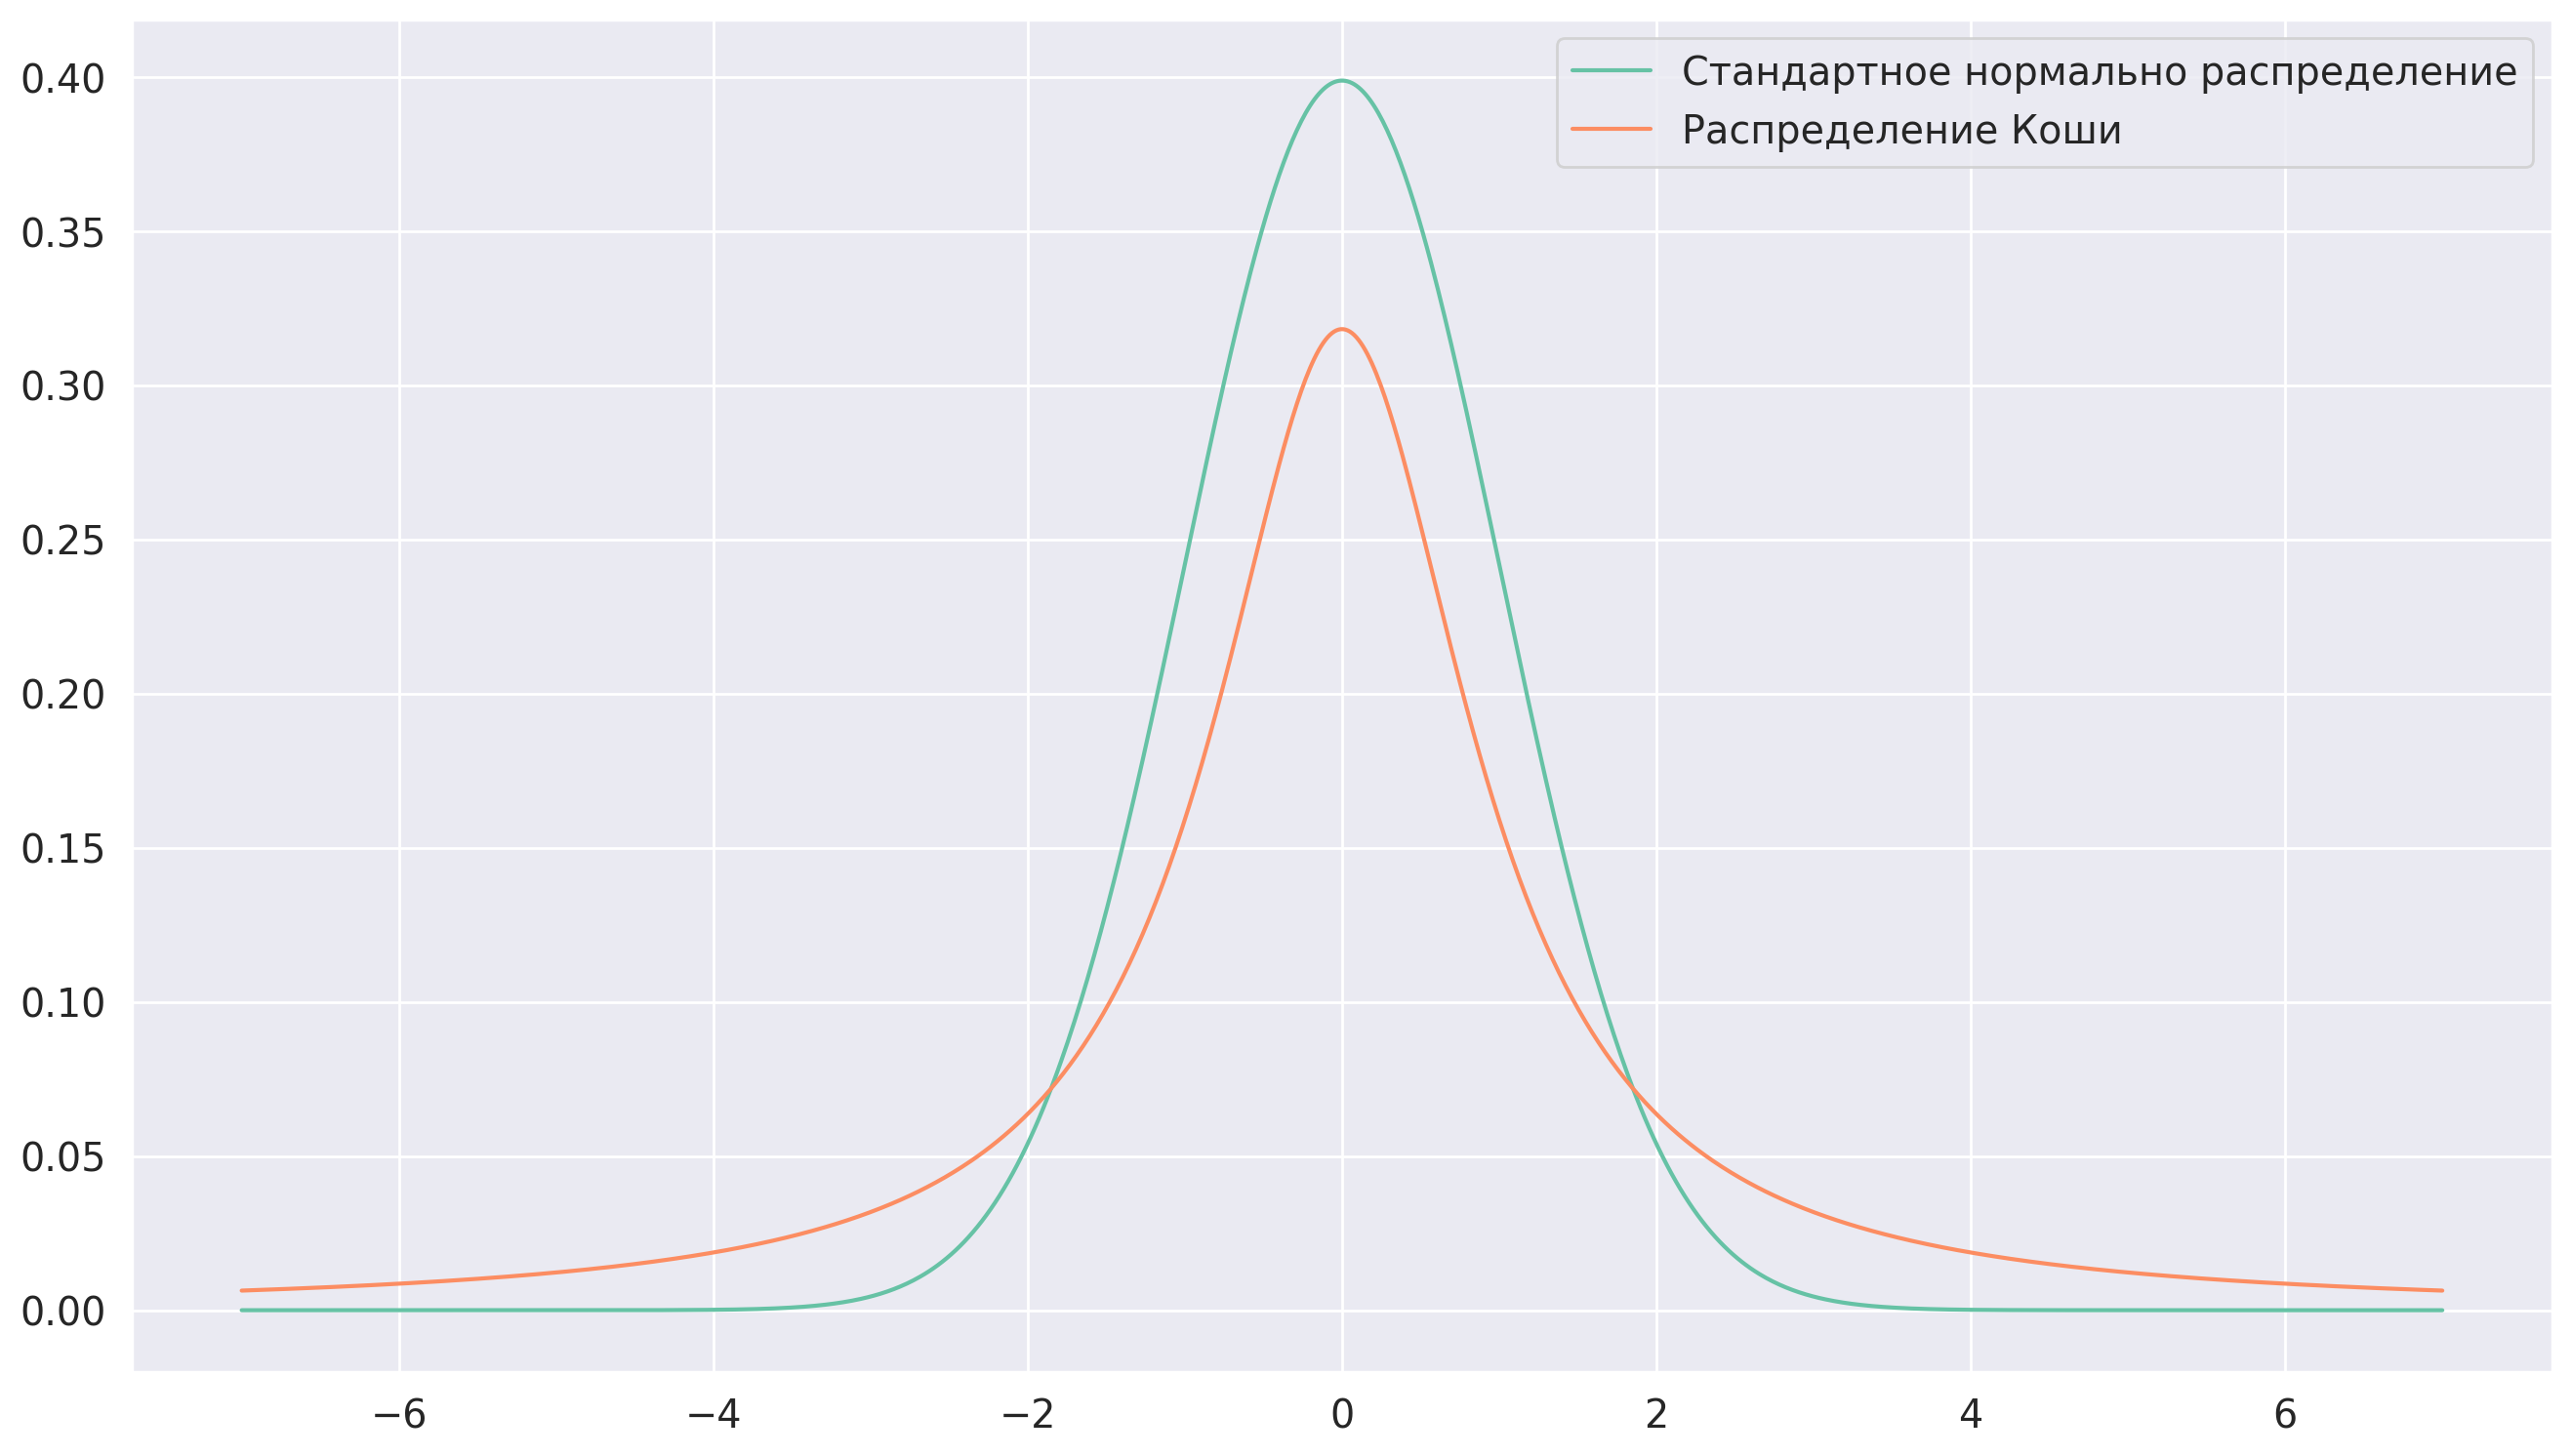

In [14]:
xAx = np.linspace(-7, 7, 1000)

plt.figure(figsize = (16, 9), dpi = 200)
plt.plot(xAx, sps.norm.pdf(xAx), label = 'Стандартное нормально распределение')
plt.plot(xAx, sps.cauchy.pdf(xAx), label = 'Распределение Коши')

plt.legend();


**Вывод:**

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

**Ответ:**<...>

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;

На графиках изобразите зависимость значений **всех оценок** от $n$ для одной реализации выборки, а на другом графики траекторий по нескольким реализациям. 

Постройте также график, на котором изобразите значения MSE для каждой оценки от размера выборки $n$.

*Указание:* $MSE_{\widehat{\theta}}(\theta) = (\widehat{\theta} - \theta)^2$. В качестве $\theta$ возьмите истинное значение для стандартного распределения Коши. Для подсчета усеченного среднего можно использовать функцию `scipy.stats.trim_mean`.

Сравните асимптотические дисперсии оценок. Сделайте вывод.

**Решение:**

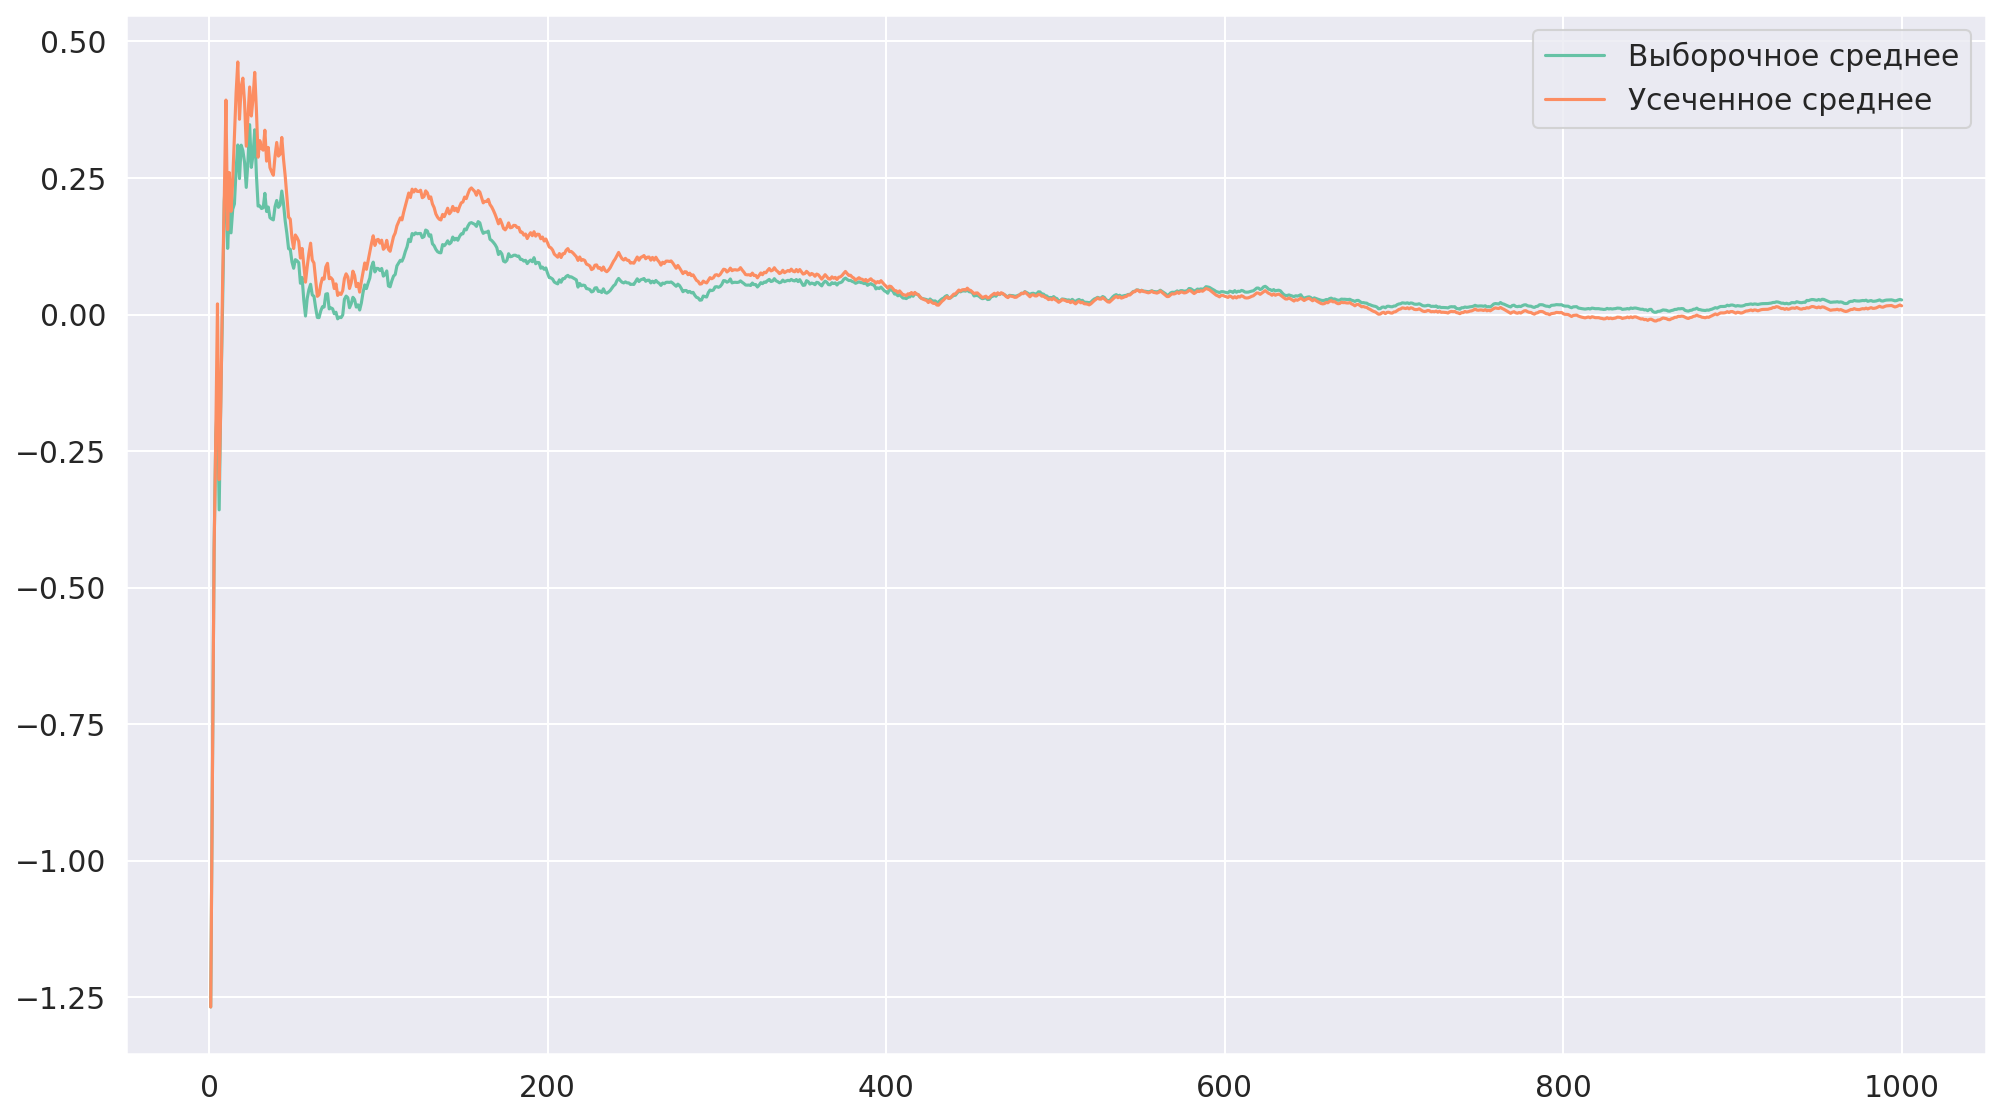

In [15]:
n = np.arange(1000, dtype = np.int64) + 1
sample = sps.norm.rvs(size = n[-1])

plt.figure(figsize = (16, 9), dpi = 150)
plt.plot(n, 
         np.cumsum(sample) / n, 
         label = "Выборочное среднее")

plt.plot(n,
         [sps.trim_mean(sample[:i], 0.2) for i in n] ,
          label = "Усеченное среднее")
plt.legend()

**Вывод:** <...>